In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Load data

In [2]:
# Stimulus
stimulus = np.load('Data/ACs/Stim/test_sequences_flicker.npy')

# Responses 
flicker_responses = np.load('Data/ACs/Cluster Averages/test_seq_response_avrg.npy')

Resample to 64 Hz

In [3]:
# Stimulus
stim_duration = stimulus.shape[1] * 0.0016 # In seconds
t_stim = np.arange(0, stim_duration, 0.0016) # Old frequency : 625
t_stim_new = np.arange(0, stim_duration, 1/64) # New frequency : 64
stim_new = -99*np.ones((t_stim_new.shape[0],6))

for i in range(6):
    f = interpolate.interp1d(t_stim, stimulus[i,:], bounds_error = False)
    stim_new[:,i] = f(t_stim_new)

Remove nans

In [4]:
np.where(t_stim_new > t_stim[-1])

(array([], dtype=int64),)

Make stimulus binary

In [5]:
stim_new_binary = stim_new.copy()
stim_new_binary[stim_new<0.5] = 0
stim_new_binary[stim_new>=0.5] = 1

Plot

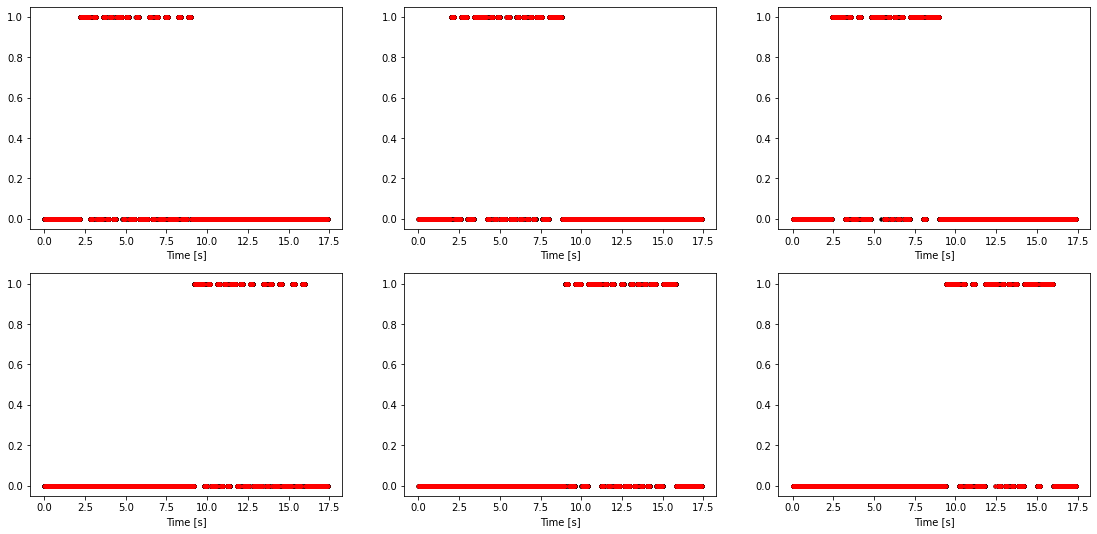

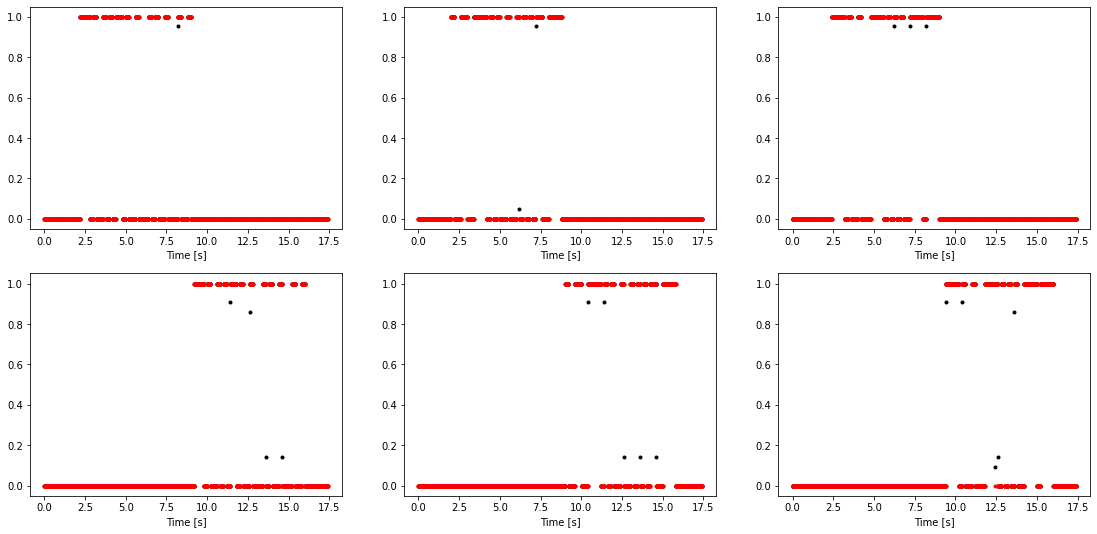

In [6]:
# Plot stim
plt.figure(figsize=(19,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(t_stim, stimulus[i,:], '.', color = 'black')
    plt.plot(t_stim_new, stim_new_binary[:,i], '.', color = 'red')
    plt.xlabel('Time [s]')
plt.show()

plt.figure(figsize=(19,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(t_stim_new, stim_new[:,i], '.', color = 'black')
    plt.plot(t_stim_new, stim_new_binary[:,i], '.', color = 'red')
    plt.xlabel('Time [s]')
plt.show()

Resample to 64 Hz

In [7]:
flicker_responses.shape

(25, 10881)

In [8]:
# Responses
assert stim_duration == flicker_responses.shape[1] * 0.0016

t_resp = np.arange(0, stim_duration, 0.0016) # Old frequency : 625
t_resp_new = np.arange(0, stim_duration, 1/64) # New frequency : 64

flicker_responses_new = -99*np.ones((flicker_responses.shape[0], t_resp_new.shape[0]))

for i in range(flicker_responses.shape[0]): # Iterate over number of clusters
    f = interpolate.interp1d(t_resp, flicker_responses[i,:], bounds_error = False)
    flicker_responses_new[i,:] = f(t_resp_new)

In [9]:
np.where(t_resp_new > t_resp[-1])

(array([], dtype=int64),)

Plot responses

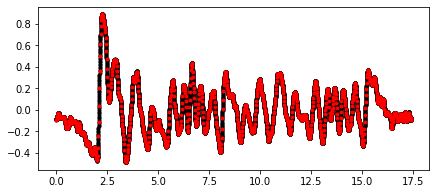

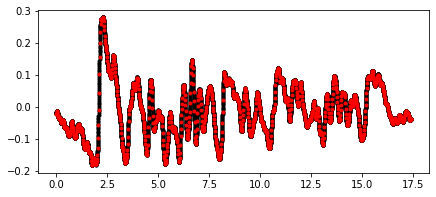

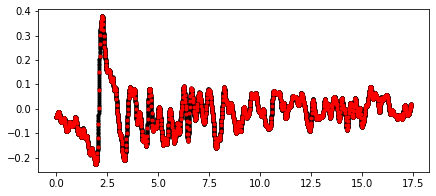

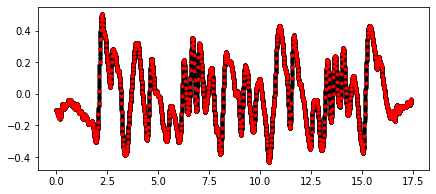

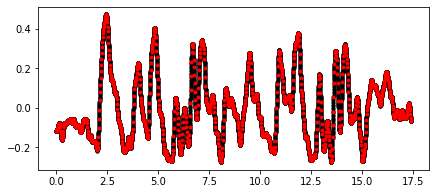

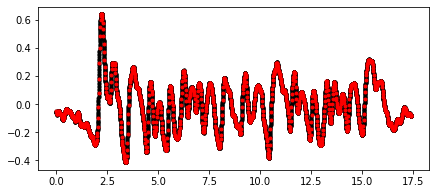

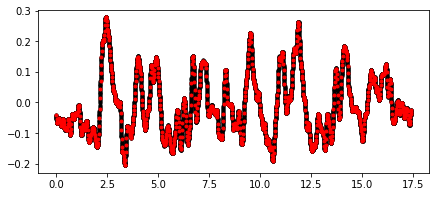

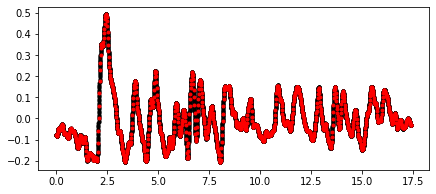

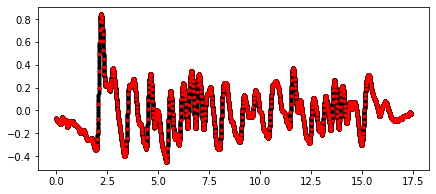

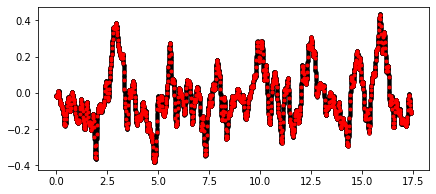

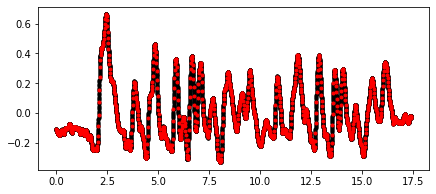

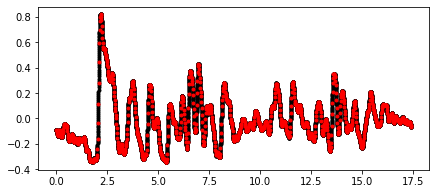

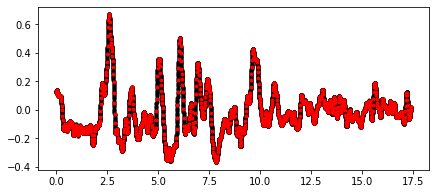

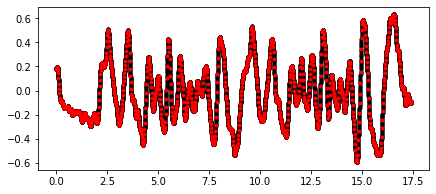

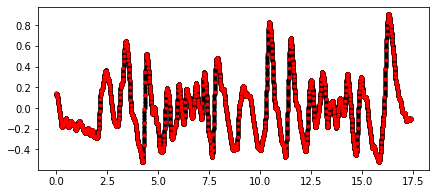

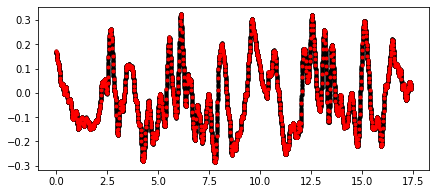

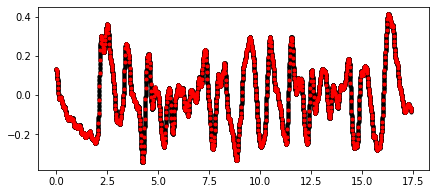

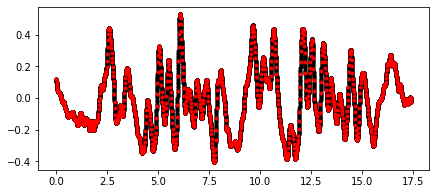

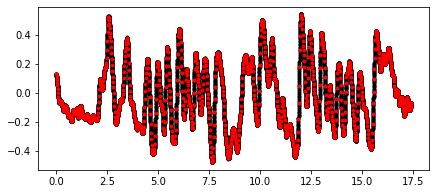

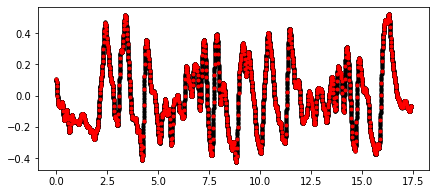

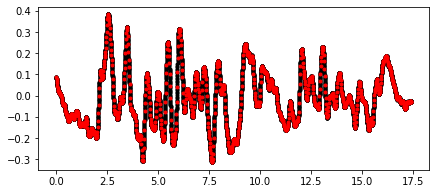

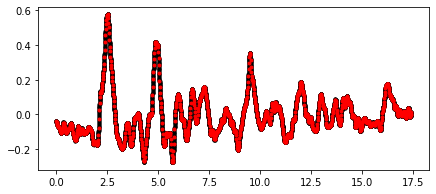

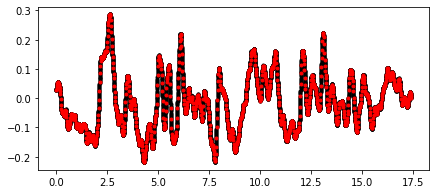

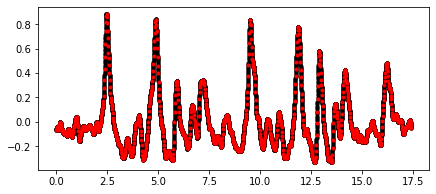

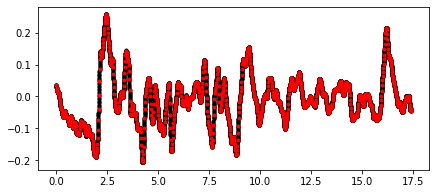

In [10]:
# Plot response
for i in range(flicker_responses.shape[0]):
    plt.figure(figsize=(7,3))
    plt.plot(t_resp, flicker_responses[i,:], '.', color = 'black')
    plt.plot(t_resp_new, flicker_responses_new[i,:], '.', color = 'red')
    plt.show()

Save arrays

In [11]:
#np.save('Data/ACs/Model Input Snippets/test_sequences_flicker_64Hz.npy', stim_new_binary)
#np.save('Data/ACs/Model Input Snippets/test_sequences_responses_flicker_avrg_64Hz.npy', flicker_responses_new)